## Libraries import

In [12]:
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter


#per poter gestire file csv
import pandas as pd

download dataset from  kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [13]:
!kaggle datasets download uom190346a/sleep-health-and-lifestyle-dataset

sleep-health-and-lifestyle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


### Extract and unzip dataset

In [14]:
zip_path = r"C:\Users\greta\Downloads\sleep-health-and-lifestyle-dataset.zip"
final_path = r"C:\Users\Greta\Desktop\Sleep_Data" 

# Crea la directory di destinazione se non esiste
os.makedirs(final_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(final_path)

In [15]:
#LO USA GIACOMO
#dataset = r"C:\Users\Giacomo\Desktop\MagistraleDocumenti\AAA - Data Visualization\Python projects\PROGETTO GIT\Sleep_Data\Sleep_health_and_lifestyle_dataset.csv"
dataset = r"C:\Users\Greta\Desktop\Sleep_Data\Sleep_health_and_lifestyle_dataset.csv" 
# Carica i dati in un DataFrame
df = pd.read_csv(dataset)

# Data visualization: overview of dataset and cleaning data

### Original dataset sample

In [16]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [54]:
df_mod = [column for column in df.columns if column!='Person ID']
for column in df_mod:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal Weight' 'Obese']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91

### CLEANING DATA:

In [20]:
# sostituisco i valori NaN con 'No disorder'
df['Sleep Disorder'].fillna('No Disorder', inplace=True)

In [56]:
sleep_disorder_conteggio = df['Sleep Disorder'].value_counts().reset_index()
#print(sleep_disorder_conteggio)

In [22]:
fig=px.pie(sleep_disorder_conteggio,values='count',names='Sleep Disorder',title="Sleep Disorder category")
fig.show()

## BMI CATEGORY

In [57]:
#sostituisco normal con normal weight
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})
BMI_Category_conteggio=df['BMI Category'].value_counts().reset_index()
#BMI_Category_conteggio

In [58]:
fig=px.pie(BMI_Category_conteggio,values='count',names='BMI Category',title="the BMI Category")
fig.show()

## GENDER

In [59]:
gender_conteggio = df["Gender"].value_counts().reset_index()
fig = px.pie( gender_conteggio , values= "count", names="Gender")
fig.show()

# What do you want to know about your data?: \ 
# COME CAMBIA IL SONNO DELLE PERSONE IN BASE A VARI FATTORI

1. Di quanto cambia il numero di ore di sonno (mediamente) in base ad età e genere? E' vero che più si invecchia, meno si dorme?  
2. Il lavoro che fai influisce sulla nascita di sleep disorder (analizzati Insommia e Sleep Apnea)?
3. C'è una correlazione tra indice BMI e sleep disorder?
4. Heart Rate e Blood Pressure sono in qualche modo in relazione con Sleep quality
5. Percentuale di persone con distrubi del sonno nelle varie fasce d'età

### Di quanto cambia il numero di ore di sonno (mediamente) in base ad età e genere? E' vero che più si invecchia, meno si dorme? 

In [61]:
# creo la colonna dei raggruppamenti per età
df['bin_age'] = pd.cut(df['Age'], bins=[25, 30, 35 ,40, 45,50,55 ], 
                          labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51+'])

# calcolo la media della qualità del sonno per ciascun gruppo di età
age_group = df.groupby(['bin_age', 'Gender'])['Sleep Duration'].mean().reset_index()

C:\Users\greta\AppData\Local\Temp\ipykernel_14616\2016626394.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [62]:
#male_data = age_group[age_group['Gender'] == 'Male']
#female_data = age_group[age_group['Gender'] == 'Female']

### plot the graph

In [154]:
fig = px.bar(
    age_group,
    x="bin_age",
    y="Sleep Duration",
    color="Gender",
    barmode="group", 
    title="Ore di Sonno per Fascia di Età e Genere",
    labels={"bin_age": "Age", "Sleep Duration": "Sleep Duration(hrs)", "Gender": "Gender"},
    color_discrete_map={'Male': '#1f77b4', 'Female':'#ff7f0e'}
)

fig.add_hline(
    y=7,
    line=dict(color="red", dash="dash", width=2),
    annotation_text="7 hrs",  # Testo accanto alla linea
    annotation_position="top right",  # Posizione del testo
    annotation_font_size=12
)

# Spostiamo il testo a lato, ad esempio a destra della linea:
fig.add_annotation(
    x=1.05,  # Posizione orizzontale a destra della linea
    y=7,  # Posizione verticale alla stessa altezza della linea
    text="At least 7 hours of sleep is recommended",  # Testo esplicativo
    showarrow=True,  # Mostra la freccia che punta alla linea
    arrowhead=4,  # Personalizza la freccia
    font=dict(size=10, color="red"),  # Colore rosso per evidenziare
    align="left",  # Allinea il testo a sinistra
    xanchor="left",  # Ancoraggio orizzontale
    yanchor="middle",  # Ancoraggio verticale
    arrowsize=1.5, # Dimensione della freccia
   
)

fig.update_layout(
    xaxis_title="Age Group",  
    yaxis_title="",  
    legend_title="Gender",  
    title_font_size=18, 
    title_x=0.5,  
    yaxis=dict(range=[0, age_group['Sleep Duration'].max() + 1],  
        tickformat=".0f",  
        ticksuffix="h"), 
    margin=dict(t=120, b=120, l=50, r=50),  
    template="plotly_white",
)


fig.add_annotation(
    x=0.95,  
    y=-0.1,  
    text="Data source:<br>Sleep Health and lifestyle dataset", 
    showarrow=False,  
    font=dict(size=10, color="black"),  
    align="left",  
    xanchor="left",  
    yanchor="top",  
    xref="paper", 
    yref="paper",  
)


fig.update_layout(
    margin=dict(t=80, b=80, l=50, r=50)  
)

fig.show()


## Il lavoro che fai influisce sulla nascita di sleep disorder (analizzati Insommia e Sleep Apnea)?

In [106]:
sleep_disorders = df[df['Sleep Disorder'] != 'No Disorder']

#calcolo quante persone hanno un disturbo del sonno per ogni professione
disorder_conteggio= sleep_disorders.groupby(['Occupation', 'Sleep Disorder']).size().unstack(fill_value=0)

In [107]:
tot = df['Occupation'].value_counts()

#percentuale di persone con disturbi del sonno per ogni occupazione
disorder_percentages = disorder_conteggio.div(tot, axis=0) * 100

In [108]:
#trasformo in dataframe
disorder_percentages = disorder_percentages.reset_index().melt(id_vars='Occupation', 
                                                               var_name='Sleep Disorder', 
                                                               value_name='Percentage')


### plot the graph

In [161]:
fig = px.bar(disorder_percentages, x='Percentage', y='Occupation', color='Sleep Disorder', 
             title='Distribuzione Percentuale dei Disturbi del Sonno per Occupazione',
             labels={'Sleep Disorder': 'Sleep Disorder', 'Percentage': 'Percentuale'},
            color_discrete_map={'Insomnia': '#8e44ad', 'Sleep Apnea': '#1abc9c'},


             orientation='h')


# Migliora la leggibilità
fig.update_layout(
    barmode='stack',  
    yaxis={'categoryorder': 'total ascending'},  # Ordina occupazioni in base alla somma
    xaxis_title='Percentuale di lavoratori con disturbi del sonno (%)',
    yaxis_title='',
    legend_title='Tipo di Disturbo del Sonno',
    template='plotly_white',  # Sfondo più pulito
    margin=dict(l=120, r=20, t=50, b=50),  # Spaziatura ottimizzata
    title_x=0.5,  # Centra il titolo

)

fig.update_traces(
    hovertemplate="<b>Sleep Disorder:%{color_discrete_sequence} <b>Percentuale:</b> %{x:.2f}%"  # Nasconde il nome dell'occupazione
)


fig.add_annotation(
    x=1.03,  
    y=0,  
    text="Data source:<br>Sleep Health and lifestyle dataset", 
    showarrow=False,  
    font=dict(size=10, color="black"),  
    align="left",  
    xanchor="left",  
    yanchor="top",  
    xref="paper", 
    yref="paper",  
)


for trace in fig.data:
    trace.customdata = disorder_percentages[disorder_percentages['Sleep Disorder'] == trace.name]['Sleep Disorder']
    trace.hovertemplate = '%{customdata}<br>%{x:.2f}%'
    trace.hoverlabel = {'namelength':0}



fig.show()

## Domanda: bmi category e sleep disorder correlazione

In [40]:
bmi_percent = df.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)
bmi_percent = bmi_percent.div(bmi_percent.sum(axis=1), axis=0) * 100


bmi_percent = bmi_percent.reset_index()
bmi_percent = bmi_percent.melt(id_vars='BMI Category', var_name='Sleep Disorder', value_name='Percentage')

In [41]:
fig = px.histogram(
    bmi_percent,
    x="BMI Category",
    y="Percentage",
    color="Sleep Disorder",
    title="Percentuale di Disturbi del Sonno per Categoria BMI",
    labels={"BMI Category": "Categoria BMI", "Percentage": "Percentuale", "Sleep Disorder": "Disturbo del Sonno"},
    barmode="stack"  # Stack delle barre per mostrare la somma al 100%
)

fig.show()

# Are Heart Rate and Blood Pressure related in some way between people with the same Physical Activity Level?

## Aggregating by Physical Activity Level


The scatter plot is too cluttered, so let's aggregate the instances by Physical Activity Level, then plotting Heart Rate mean and MAP mean for each group

c:\Users\greta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\greta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\greta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\greta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



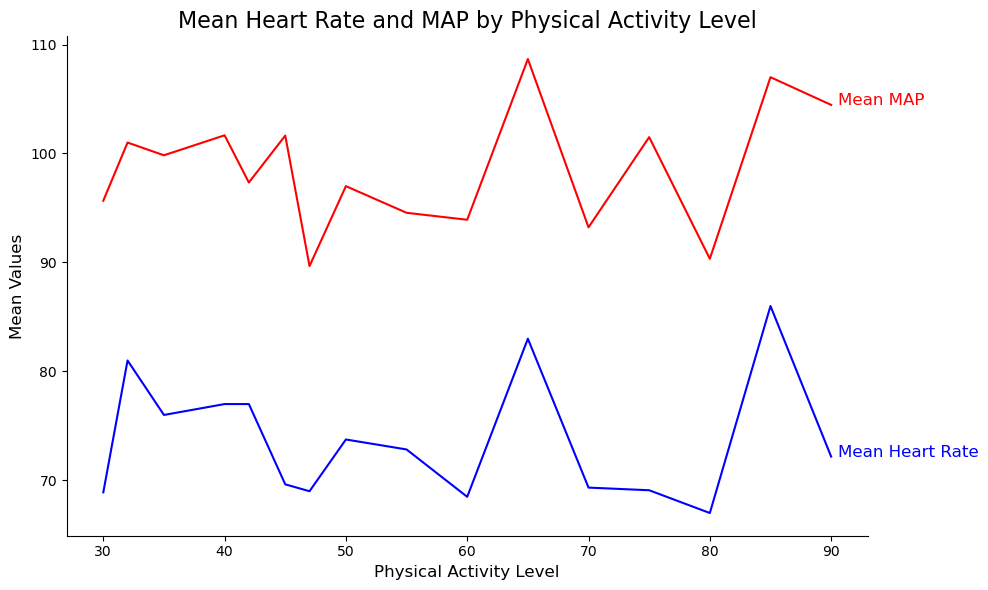

In [42]:
data = pd.read_csv(dataset)

# Calculate Mean Arterial Pressure (MAP)
def calculate_map(bp):
    max_bp, min_bp = map(int, bp.split('/'))
    return min_bp + (max_bp - min_bp) / 3

data['MAP'] = data['Blood Pressure'].apply(calculate_map)

# Aggregate Data by Physical Activity Level
aggregated_data = data.groupby('Physical Activity Level').agg({
    'Heart Rate': 'mean',
    'MAP': 'mean'
}).reset_index()

# Plot the Aggregated Data
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_data, x='Physical Activity Level', y='Heart Rate', label='Mean Heart Rate', color='b')
sns.lineplot(data=aggregated_data, x='Physical Activity Level', y='MAP', label='Mean MAP', color='r')
sns.despine()

# Add labels and title
plt.title('Mean Heart Rate and MAP by Physical Activity Level', fontsize=16)
plt.xlabel('Physical Activity Level', fontsize=12)
plt.ylabel('Mean Values', fontsize=12)

for line in plt.gca().lines:
    line_label = line.get_label()
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    plt.annotate(line_label, xy=(x_data[-1], y_data[-1]), xytext=(5, 0), textcoords='offset points', color=line.get_color(), fontsize=12)

plt.legend().remove()
plt.tight_layout()
plt.show()

# Percentuale di persone con disturbi del sonno nelle varie fasce di età

C:\Users\greta\AppData\Local\Temp\ipykernel_14616\177731866.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



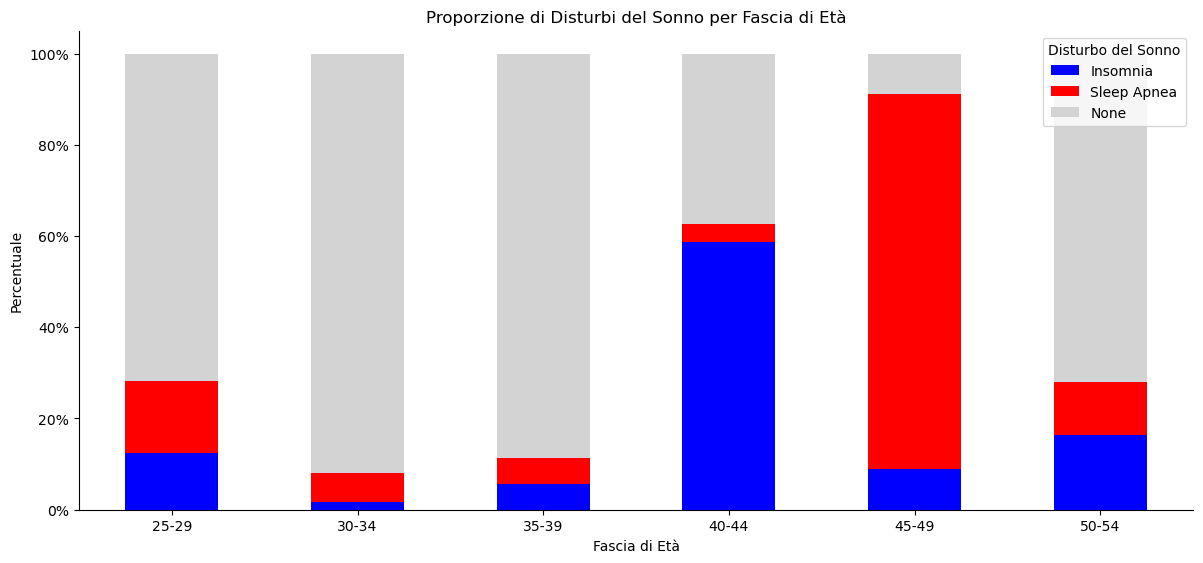

In [43]:
data = pd.read_csv(dataset)

# Create Age Groups
data['Age Group'] = pd.cut(data['Age'], bins=[25, 30, 35, 40, 45, 50, 55], labels=['25-29', '30-34', '35-39', '40-44', '45-49', '50-54'])

# Fill NaN values in 'Sleep Disorder' with 'None'
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')

# Calculate Proportion of Sleep Disorders by Age Group
disorder_counts = data.groupby(['Age Group', 'Sleep Disorder']).size().unstack(fill_value=0)
disorder_proportions = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100

# Ensure the columns are in the correct order
disorder_proportions = disorder_proportions[['Insomnia', 'Sleep Apnea', 'None']]

# Plot the data
colors = {'Insomnia': 'blue', 'Sleep Apnea': 'red', 'None': 'lightgray'}
ax = disorder_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in disorder_proportions.columns])

plt.title('Proporzione di Disturbi del Sonno per Fascia di Età')
plt.xlabel('Fascia di Età')
plt.ylabel('Percentuale')
plt.legend(title='Disturbo del Sonno')
plt.tight_layout()
plt.xticks(rotation=0)
sns.despine()

# Format y-axis labels to include percentage sign
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.show()

## Versione migliore con HOVER

In [55]:
data = pd.read_csv(dataset)

# Create Age Groups
data['Age Group'] = pd.cut(data['Age'], bins=[25, 30, 35, 40, 45, 50, 55], labels=['25-29', '30-34', '35-39', '40-44', '45-49', '50-54'])


data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Disorder')

# Calculate Proportion of Sleep Disorders by Age Group
disorder_counts = data.groupby(['Age Group', 'Sleep Disorder']).size().unstack(fill_value=0)
disorder_proportions = disorder_counts.div(disorder_counts.sum(axis=1), axis=0) * 100

# Reset index for plotting
disorder_proportions = disorder_proportions.reset_index()

# Melt the dataframe for Plotly
melted_df = disorder_proportions.melt(id_vars='Age Group', var_name='Sleep Disorder', value_name='Percentage')

# Create the Interactive Plot with specified colors
fig = px.bar(melted_df, x='Age Group', y='Percentage', color='Sleep Disorder', text=None,
             title='Percentage of sleep disorders for each age group',
             labels={'Age Group': 'Age Group', 'Percentage': 'Percentage', 'Sleep Disorder': 'Sleep Disorder'},
             category_orders={'Sleep Disorder': ['Insomnia', 'Sleep Apnea', 'None']},
             color_discrete_map={'Insomnia': '#6D8B74', 'Sleep Apnea': '#A5D6A7', 'None': '#E0E0E0'})

# Update layout for better readability
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder':'category ascending'},
    yaxis={'title': '', 'tickformat':''},
    plot_bgcolor='rgba(255,255,255,255)', 
    paper_bgcolor='rgba(255,255,255,255)',
    showlegend = False
)

for trace in fig.data:
    trace.customdata = melted_df[melted_df['Sleep Disorder'] == trace.name]['Sleep Disorder']
    trace.hovertemplate = '%{customdata}<br>%{x}<br>%{y:.3f}%'
    trace.hoverlabel = {'namelength': 0}

# Show the plot
fig.show()


C:\Users\greta\AppData\Local\Temp\ipykernel_14616\2619299812.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Bad sleep quality is associated with obesity or overweight individuals?

In [45]:
data = pd.read_csv(dataset)

# Replace "Normal Weight" with "Normal" in the BMI Category column
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')
# Replace "Obese" with "Overweight" in the BMI Category column
#data['BMI Category'] = data['BMI Category'].replace('Obese', 'Overweight')

# Verify the change
data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

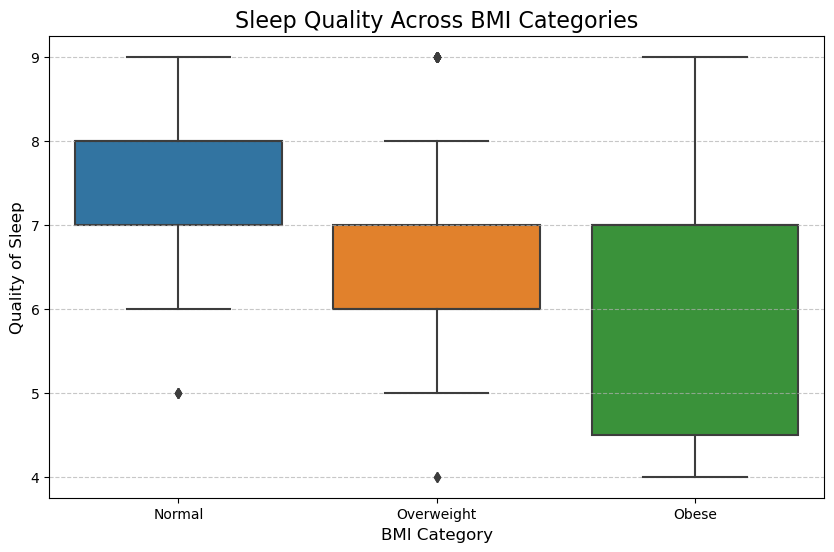

In [46]:
# Create a boxplot to visualize the distribution of sleep quality across BMI categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='BMI Category', y='Quality of Sleep', order=['Normal', 'Overweight', 'Obese'])

# Add labels and title
plt.title('Sleep Quality Across BMI Categories', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

c:\Users\greta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



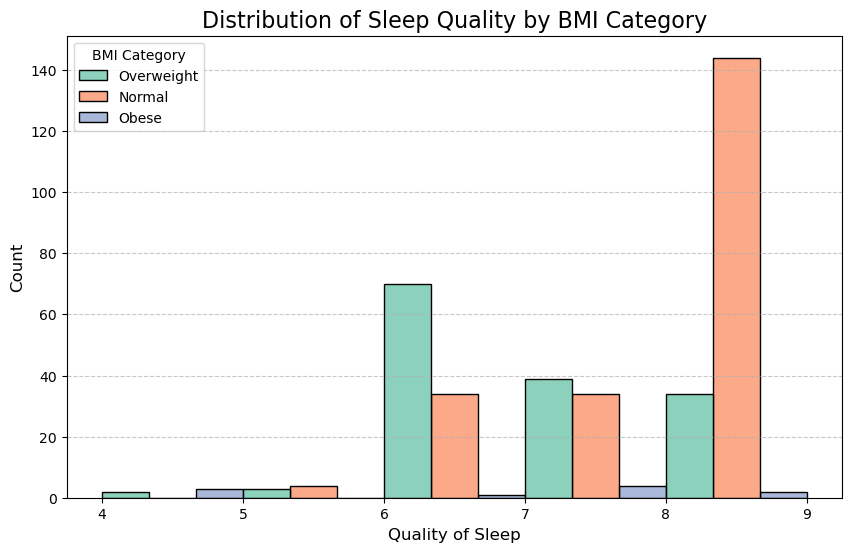

In [47]:
# Histogram/faceted density plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Quality of Sleep', hue='BMI Category', multiple='dodge', binwidth=1, palette='Set2', edgecolor='black')
plt.title('Distribution of Sleep Quality by BMI Category', fontsize=16)
plt.xlabel('Quality of Sleep', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()